<a href="https://colab.research.google.com/github/Itiel-z/Intro-to-AI-colab/blob/main/Assignment_6_Intro2AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 6 - Itiel

# Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# --- Data Collection and Loading ---

In [2]:
# Load the 'California Housing' dataset from sklearn and convert it into a pandas DataFrame.
california_housing = fetch_california_housing(as_frame=True)
df = california_housing.frame
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


# --- Quick Check of Data ---

In [3]:
# Display the first few rows of the dataset to understand its structure.
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
# Check the features and target variable. Identify which is continuous and categorical if applicable
print(f'Below if the basic information about the structure of the dataset:\n')
df.info()
print(f'Below is the summary statistics of the dataset:\n')
df.describe()

Below if the basic information about the structure of the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
Below is the summary statistics of the dataset:



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


All the available features are contiuous numeric and the target variable which in this case is the *MedHouseVal* is also a continuous numerical value

# --- EDA and Data Preprocessing ---

In [5]:
# Check for missing/null values.
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


<Axes: xlabel='AveOccup', ylabel='MedHouseVal'>

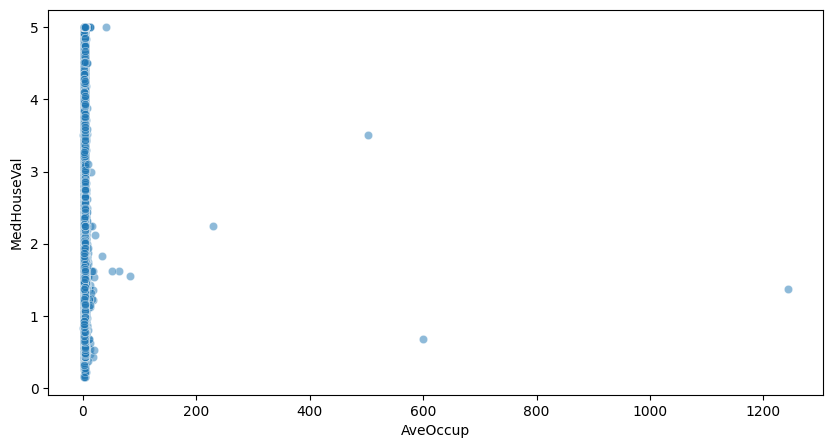

In [6]:
# scatter plot for medhouseval and aveoccup
plt.figure(figsize = (10, 5))
sns.scatterplot(data = df, x = 'AveOccup', y = 'MedHouseVal', alpha = 0.5)

<Axes: xlabel='Population', ylabel='MedHouseVal'>

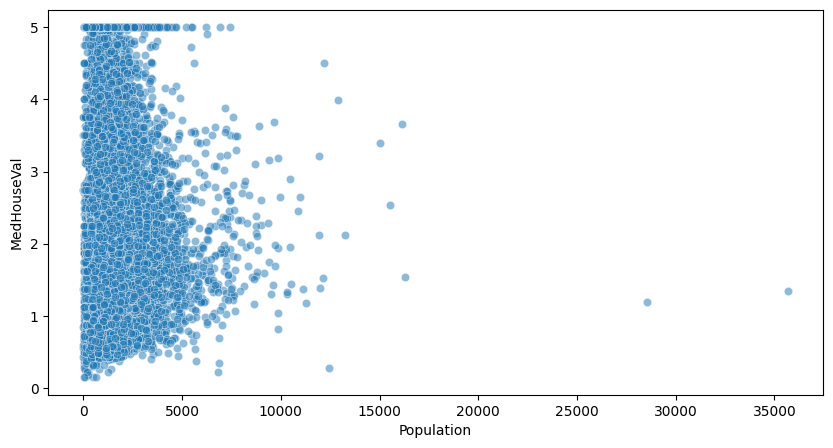

In [7]:
# scatter plot for medhouseval and population
plt.figure(figsize = (10, 5))
sns.scatterplot(data = df, x = 'Population', y = 'MedHouseVal', alpha = 0.5)

<Axes: xlabel='AveBedrms', ylabel='MedHouseVal'>

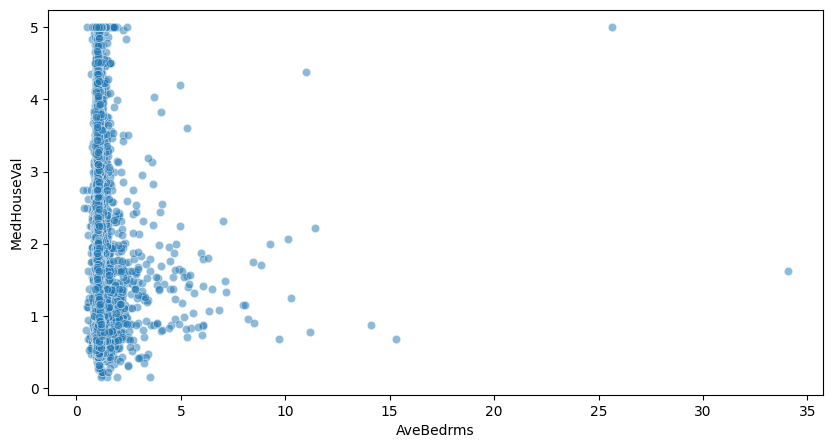

In [8]:
# Scatter plot for medhouseval and avebedrms
plt.figure(figsize = (10, 5))
sns.scatterplot(data = df, x = 'AveBedrms', y = 'MedHouseVal', alpha = 0.5)

<Axes: xlabel='HouseAge', ylabel='MedHouseVal'>

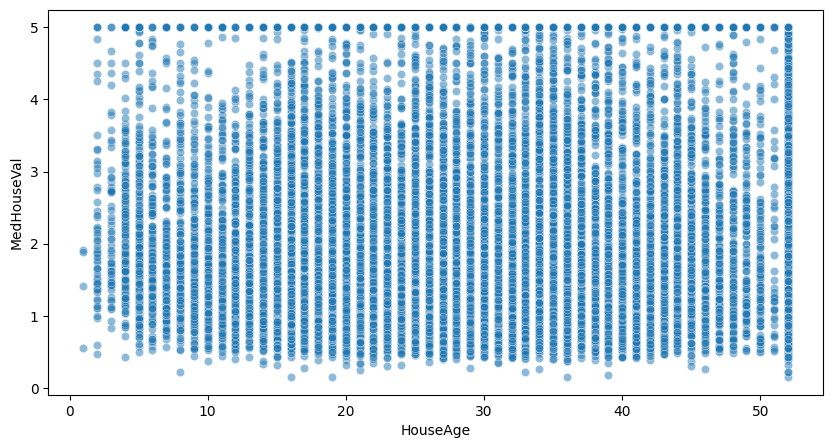

In [9]:
# Scatter plot for medhouseval and HouseAge
plt.figure(figsize = (10, 5))
sns.scatterplot(data = df, x = 'HouseAge', y = 'MedHouseVal', alpha = 0.5)

<Axes: xlabel='MedInc', ylabel='MedHouseVal'>

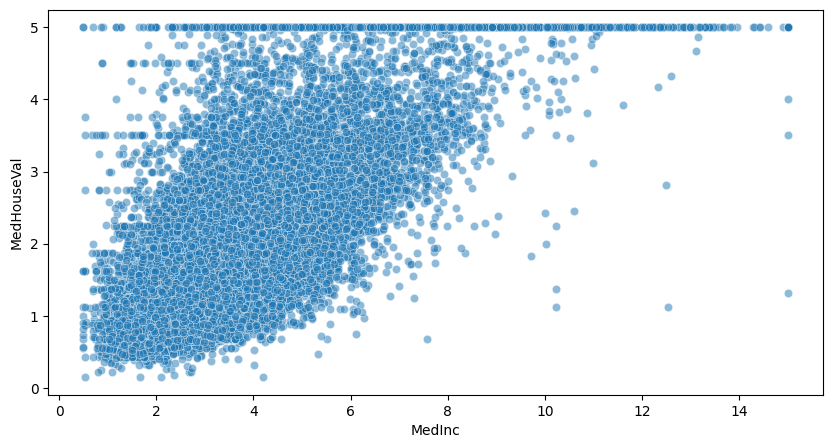

In [10]:
# Scatter plot for medhouseval and medinc
plt.figure(figsize = (10, 5))
sns.scatterplot(data = df, x = 'MedInc', y = 'MedHouseVal', alpha = 0.5)

<Axes: xlabel='AveRooms', ylabel='MedHouseVal'>

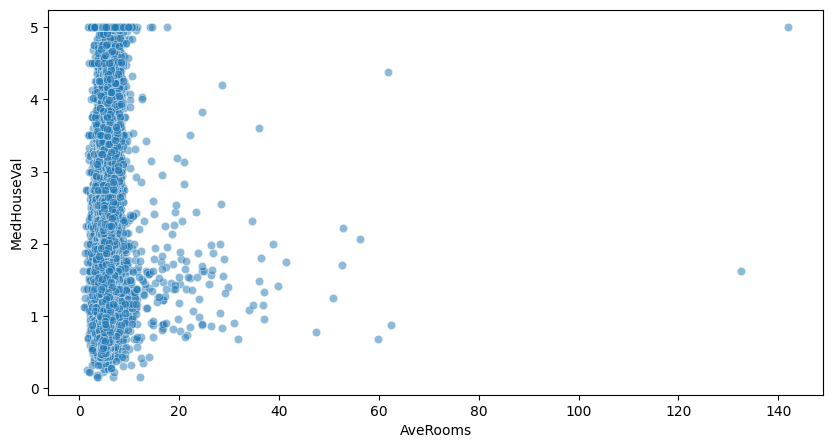

In [11]:
# scatter plot for medhouseval an averooms
plt.figure(figsize = (10, 5))
sns.scatterplot(data = df, x = 'AveRooms', y = 'MedHouseVal', alpha = 0.5)

# Automating scatter plot creation

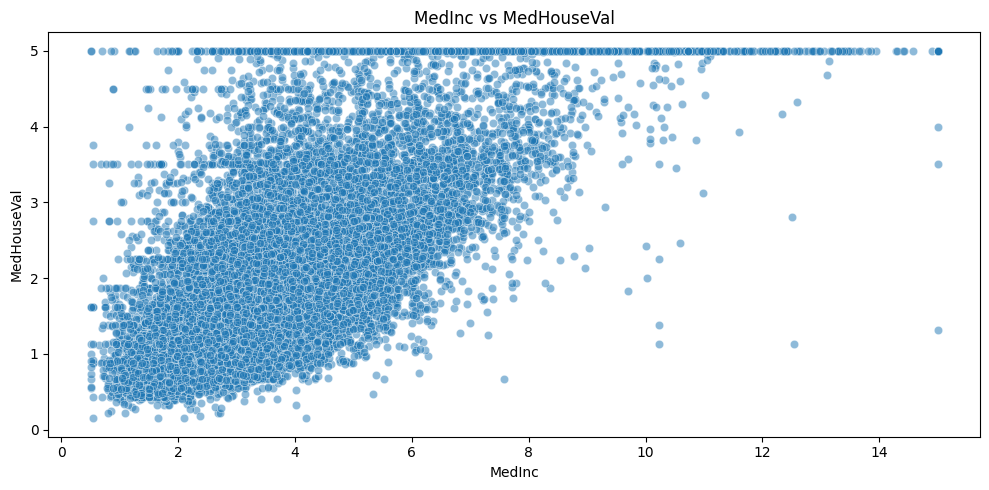

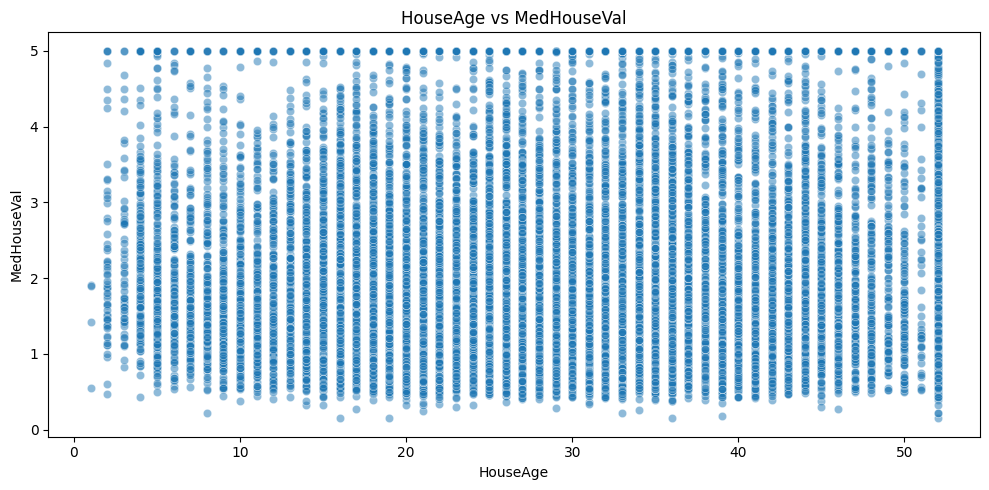

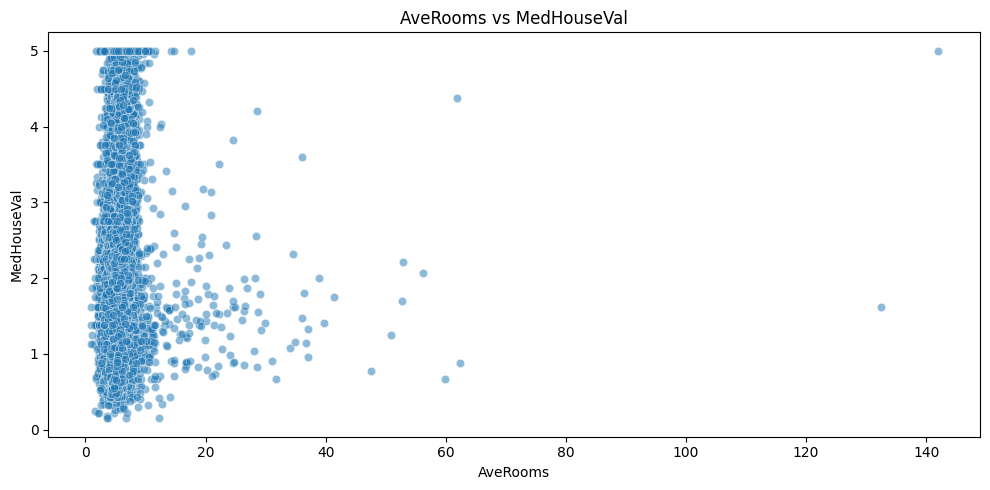

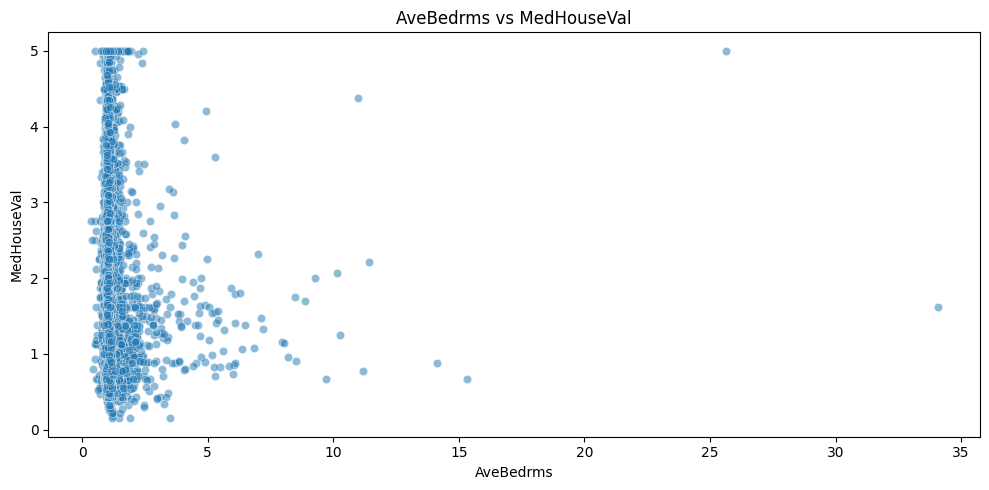

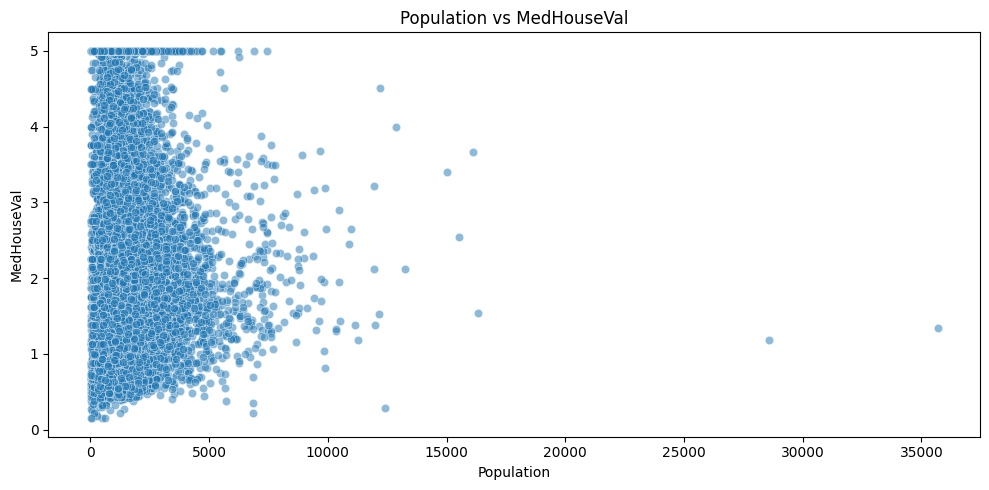

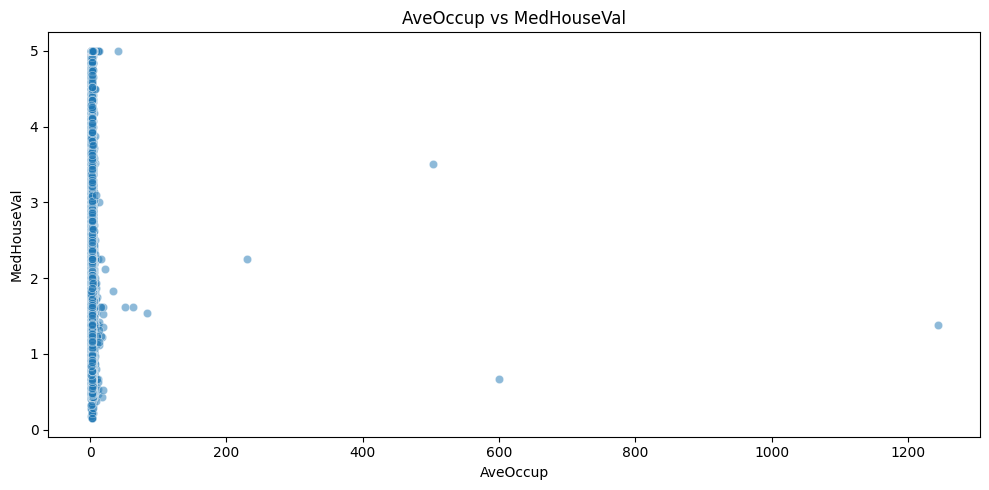

In [12]:
# Visualize the data. Create scatter plots to see the relationship between independent features and the target variable (MedHouseVal).
# create variables for easy of use
features  = df.drop(columns=['MedHouseVal', 'Latitude', 'Longitude'])
target = df['MedHouseVal']
for feature in features.columns:
    plt.figure(figsize = (10, 5))
    sns.scatterplot(data = df, x = feature, y = target, alpha = 0.5)
    plt.title(f'{feature} vs MedHouseVal')
    plt.xlabel(feature)
    plt.ylabel('MedHouseVal')
    plt.tight_layout()
    plt.show()

# --- ML Model Training ---

In [13]:
# set variables
X = df.drop(columns=['MedHouseVal'])
y = target

#  Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')

Mean Squared Error: 0.5559
R-squared: 0.5758


# --- Model Prediction ---

In [28]:
# Predict Median House Value from a new set of feature inputs.
new_house = pd.DataFrame({
    'MedInc': [3],
    'HouseAge': [30],
    'AveRooms': [6],
    'AveBedrms': [1],
    'Population': [1500],
    'AveOccup': [3],
    'Latitude': [34],
    'Longitude': [-118]})

predicted_value = model.predict(new_house)
print(f'Predicted Median House Value: ${predicted_value[0]*100000:,.2f}')

Predicted Median House Value: $154,866.33


In [29]:
# Another prediction: features order (MedInc,	HouseAge,	AveRooms,	AveBedrms,	Population,	AveOccup,	Latitude,	Longitude)
his_house = np.array([[7.56, 25, 9, 4, 220, 4, 37.94, -122.82]])

predicted_value = model.predict(his_house)
print(f'Predicted Median House Value: ${predicted_value[0]*100000:,.2f}')

Predicted Median House Value: $596,102.64
